In [1]:
import pandas as pd
import seaborn as sns
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score,log_loss ,matthews_corrcoef, confusion_matrix, accuracy_score, log_loss, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import IPython.display as ipd
import warnings
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data, meta = arff.loadarff("/kaggle/input/mhd-ahmed-dataset/final dataset.arff")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,NODE_NAME_FROM,NODE_NAME_TO,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,16091.0,24780100.0,b'Switch1',b'Router',35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,16092.0,24781700.0,b'Router',b'server1',20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,16092.0,885060.0,b'Router',b'Switch2',7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,16085.0,884675.0,b'Router',b'Switch1',39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,16088.0,884840.0,b'Router',b'Switch1',16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'


In [5]:
df.tail()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,NODE_NAME_FROM,NODE_NAME_TO,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
2160663,24.10,10.00,43184.0,22.0,10.0,b'ack',55.0,b'-------',11.0,1343.0,16103.0,885665.0,b'Switch2',b'clien-10',5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,1.030013,50.040562,b'Normal'
2160664,24.12,12.00,376386.0,23.0,22.0,b'ack',55.0,b'-------',13.0,10991.0,16103.0,885665.0,b'Router',b'Switch2',34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,1.030026,50.051067,b'Normal'
2160665,1.00,24.10,140121.0,21.0,23.0,b'tcp',1540.0,b'-------',2.0,4374.0,16091.0,24780100.0,b'Switch1',b'Router',14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,1.000000,50.013418,b'Normal'
2160666,5.00,24.50,26800.0,5.0,21.0,b'tcp',1540.0,b'-------',6.0,832.0,16091.0,24780100.0,b'clien-5',b'Switch1',3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,1.000000,50.027339,b'Normal'
2160667,15.00,24.15,549560.0,22.0,23.0,b'tcp',1540.0,b'-------',16.0,15367.0,16092.0,24781700.0,b'Switch2',b'Router',47.792490,47.792490,47.802613,0.0,328.205808,505437.0,1540.0,0.236337,0.0,47.782367,47.812736,1.000000,50.030211,b'Normal'


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            float64
 3   FROM_NODE         float64
 4   TO_NODE           float64
 5   PKT_TYPE          object 
 6   PKT_SIZE          float64
 7   FLAGS             object 
 8   FID               float64
 9   SEQ_NUMBER        float64
 10  NUMBER_OF_PKT     float64
 11  NUMBER_OF_BYTE    float64
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [7]:
label_encoder = LabelEncoder()
df['PKT_TYPE'] = label_encoder.fit_transform(df['PKT_TYPE'])
df['FLAGS'] = label_encoder.fit_transform(df['FLAGS'])
df['NODE_NAME_FROM'] = label_encoder.fit_transform(df['NODE_NAME_FROM'])
df['NODE_NAME_TO'] = label_encoder.fit_transform(df['NODE_NAME_TO'])

In [8]:
df['PKT_CLASS'].value_counts()

PKT_CLASS
b'Normal'        1935959
b'UDP-Flood'      201344
b'Smurf'           12590
b'SIDDOS'           6665
b'HTTP-FLOOD'       4110
Name: count, dtype: int64

In [9]:
df['PKT_CLASS'] = df['PKT_CLASS'].str.decode('utf-8')  
df['PKT_CLASS'] = df['PKT_CLASS'].str.strip("b'")    

In [10]:
label_mapping = {"Normal": 0, "UDP-Flood": 1, "Smurf": 1, "SIDDOS": 1, "HTTP-FLOOD": 1}
df['PKT_CLASS'] = df['PKT_CLASS'].map(label_mapping)

In [11]:
df.keys()

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')

In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [13]:
df.dropna(inplace = True)

In [14]:
has_inf_rows = df.map(np.isinf).any(axis=1)
df.drop(index=df[has_inf_rows].index, inplace=True)

In [15]:
has_inf = df.map(np.isinf).any().any()
has_nan = df.isnull().values.any()
if has_inf:
    print("The DataFrame contains infinite values.")
else:
    print("No Infinte Values")
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("No NaN Values")

No Infinte Values
No NaN Values


In [16]:
def correlation(df):
    df = df.select_dtypes(exclude=['object']) 
    df = df[[col for col in df if df[col].nunique() > 1]]
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,12))
    ax = sns.heatmap(corr)
    plt.show()

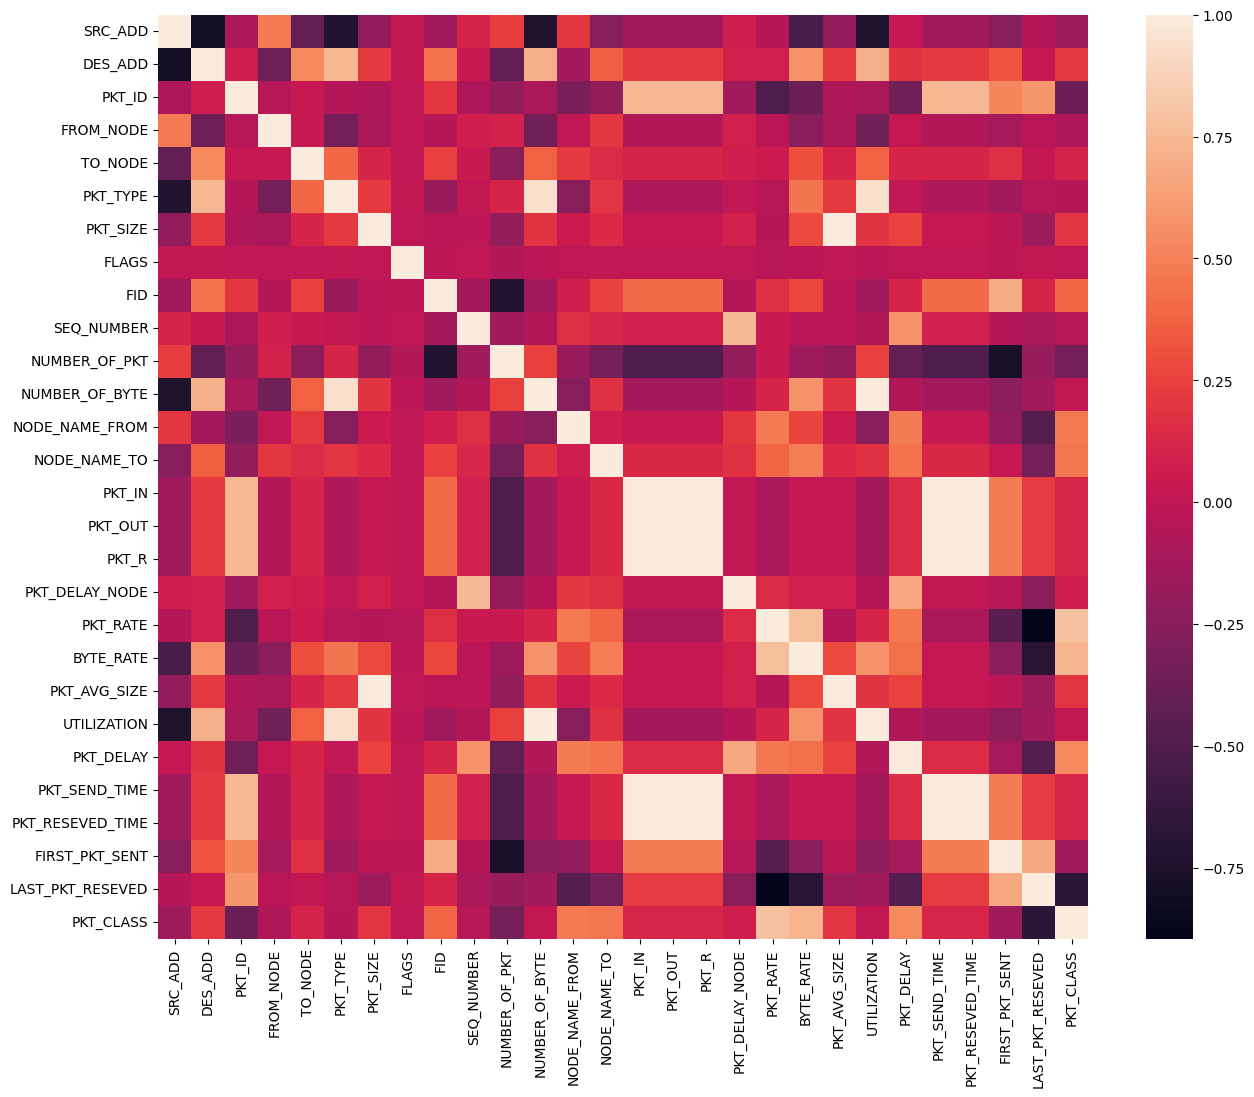

In [17]:
correlation(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            float64
 3   FROM_NODE         float64
 4   TO_NODE           float64
 5   PKT_TYPE          int64  
 6   PKT_SIZE          float64
 7   FLAGS             int64  
 8   FID               float64
 9   SEQ_NUMBER        float64
 10  NUMBER_OF_PKT     float64
 11  NUMBER_OF_BYTE    float64
 12  NODE_NAME_FROM    int64  
 13  NODE_NAME_TO      int64  
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

## **Ensemble Machine Learning algorithm**

In [19]:
predictorNames = ['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED']

In [20]:
predictors = df[predictorNames]

In [21]:
response = df['PKT_CLASS']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# **Boasting (Adaboast Classifier) {1}** #

In [23]:
template = DecisionTreeClassifier(max_depth=5)

In [24]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)

In [25]:
classificationEnsemble.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=100)

In [26]:
y_pred1 = classificationEnsemble.predict(X_test)

In [27]:
Accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
mcc1 = matthews_corrcoef(y_test, y_pred1)

In [28]:
print("Mhd Ahmed Dataset Boasting")
print('Accuracy:', Accuracy1*100)
print('Recall:', recall1*100)
print('Precision:', precision1*100)
print('F1 Score:', f11*100)
print('MCC Score:', mcc1*100)

Mhd Ahmed Dataset Boasting
Accuracy: 98.65203848806158
Recall: 87.14018358435077
Precision: 99.86467509255714
F1 Score: 93.0695189710764
MCC Score: 92.58988264170539


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


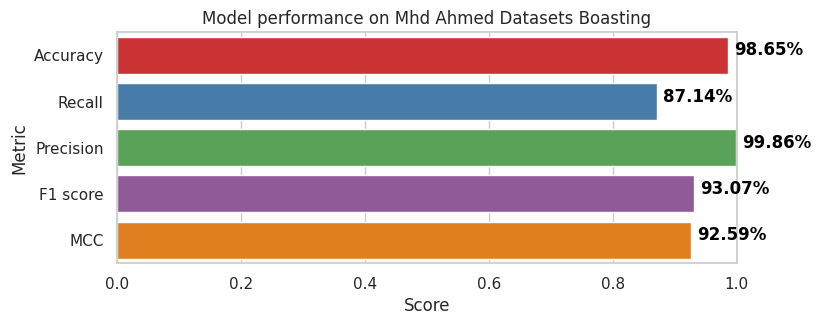

In [29]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy1, recall1, precision1, f11,mcc1]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on Mhd Ahmed Datasets Boasting")

plt.show()


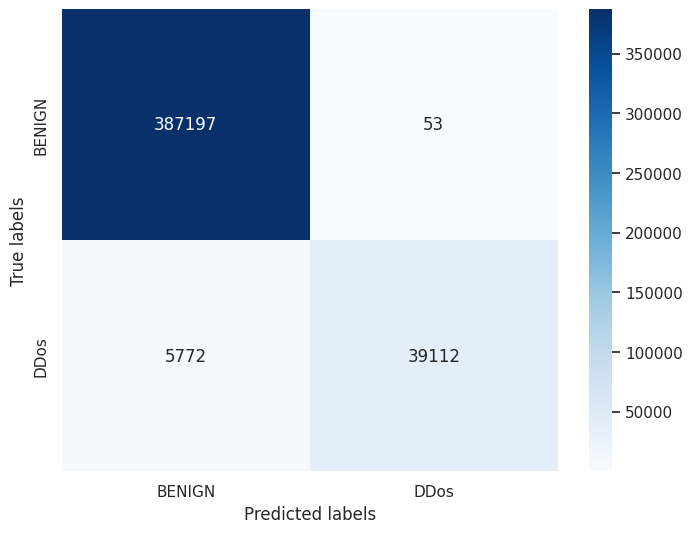

In [30]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# **Bagging** #

In [31]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [32]:
bagging = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [33]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [34]:
y_pred2 =bagging.predict(X_test)

In [35]:
Accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
mcc2 = matthews_corrcoef(y_test, y_pred2)

In [36]:
print("Mhd Ahmed Dataset Bagging")
print('Accuracy:', Accuracy2*100)
print('Recall:', recall2*100)
print('Precision:', precision2*100)
print('F1 Score:', f12*100)
print('MCC Score:', mcc2*100)

Mhd Ahmed Dataset Bagging
Accuracy: 98.65435258507777
Recall: 87.14463951519473
Precision: 99.8850838887612
F1 Score: 93.08092286091643
MCC Score: 92.60320006957366


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


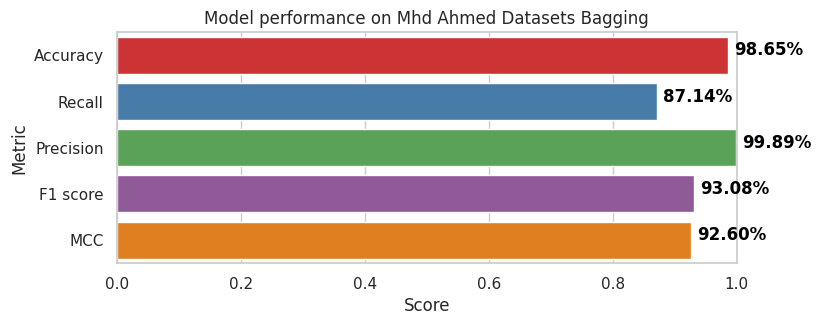

In [37]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy2, recall2, precision2, f12,mcc2]  

sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, f'{v * 100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title("Model performance on Mhd Ahmed Datasets Bagging")

plt.show()


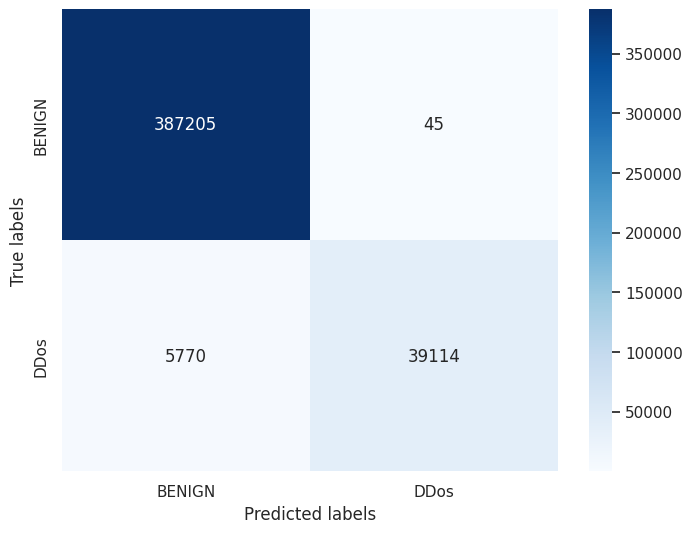

In [38]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()